In [1]:
from poke.poke_core import Rayfront
from poke.poke_math import np
import poke.plotting as plot

pth_to_lens = 'C:/Users/Work/Desktop/poke/experiments/physics_validation/singlet.zmx'

# rayfront parameters
number_of_rays = 23 # across the entrance pupil
wavelength = 0.6e-6
pupil_radius = 50/2 # semi-aperture of lens
max_field_of_view = 1 # degrees

rf = Rayfront(number_of_rays, wavelength, pupil_radius, max_field_of_view, circle=True)

norm fov =  [0. 0.]
base ray shape  (4, 373)


In [2]:
n_air = 1.
n_glass = 1.5

n_front = (n_air, n_glass)
n_rear = (n_glass, n_air)


front = {"surf": 1, "coating": n_front, "mode": "transmit"}
rear = {"surf": 2, "coating": n_rear, "mode": "transmit"}
rf.as_polarized([front, rear])

In [3]:
import zosapi
zosapi.App()
rf.trace_rayset(pth_to_lens)

tracing with global coordinates
tracing with global coordinates
1 Raysets traced through 2 surfaces


In [45]:
rf.compute_jones_pupil()

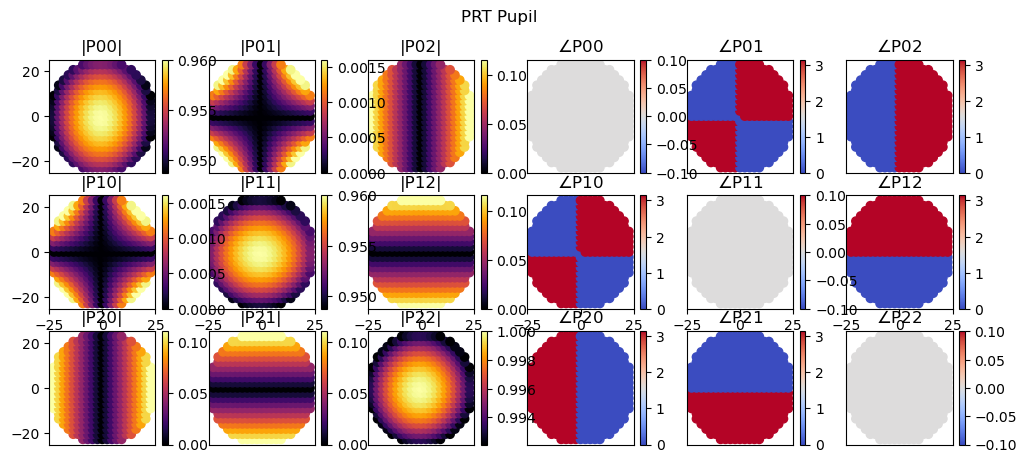

In [47]:
plot.prt_pupil(rf, coordinates='polar')

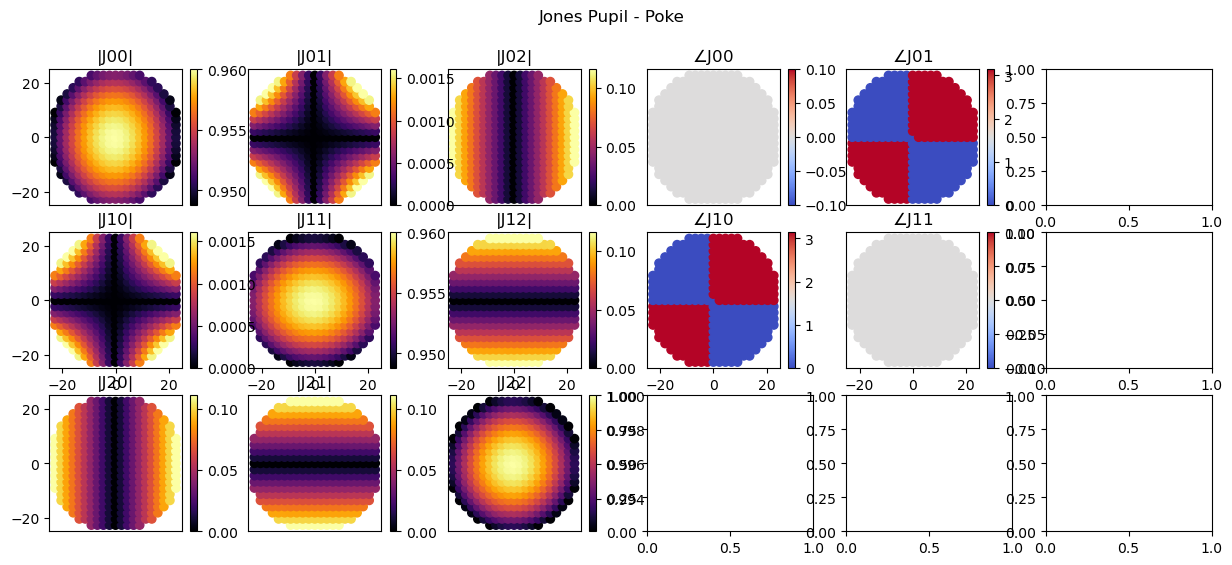

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[15, 6], nrows=3, ncols=6)
plt.suptitle("Jones Pupil - Poke")
for j in range(3):
    for k in range(3):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(rf.xData[0,0], rf.yData[0,0], c=np.abs(rf.P_total[-1][...,j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 3]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(rf.xData[0,0], rf.yData[0,0], c=np.angle(rf.P_total[-1][...,j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

# Compare to data from John Krist's macro

In [7]:
parent_pth = 'C:/Users/Work/Desktop/poke/experiments/physics_validation/'

xpol = np.genfromtxt(parent_pth+'singlet__xin_600nm.txt', skip_header=1).T
ypol = np.genfromtxt(parent_pth+'singlet__yin_600nm.txt', skip_header=1).T
x, y = xpol[0], xpol[1]

Exx = xpol[2] + 1j*xpol[3]
Eyx = xpol[4] + 1j*xpol[5]
Ezx = xpol[6] + 1j*xpol[7]
Exy = ypol[2] + 1j*ypol[3]
Eyy = ypol[4] + 1j*ypol[5]
Ezy = ypol[6] + 1j*ypol[7]
J_zmx = np.array([[Exx, Exy],[Eyx, Eyy]])
print(J_zmx.shape)
print(rf.jones_pupil[-1].shape)

(2, 2, 373)
(373, 3, 3)


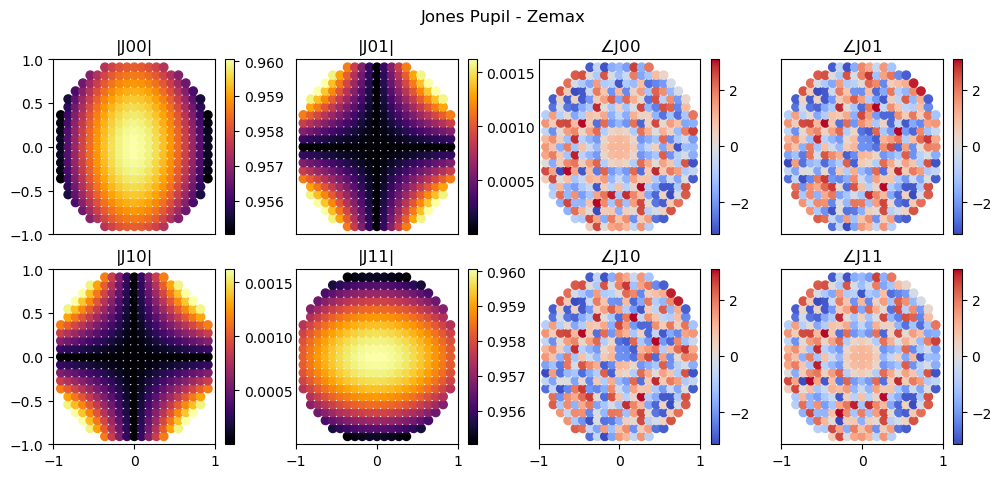

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
plt.suptitle("Jones Pupil - Zemax")
for j in range(2):
    for k in range(2):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.abs(J_zmx[j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 2]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.angle(J_zmx[j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

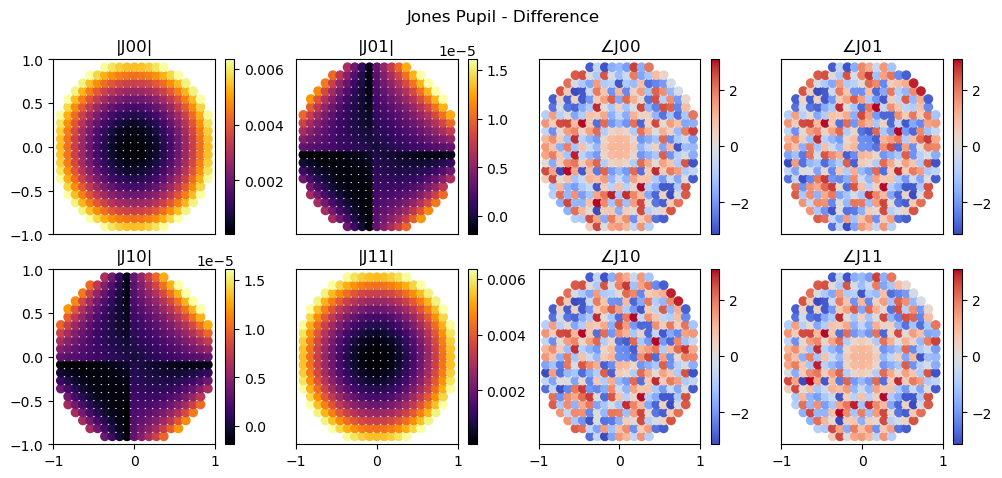

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
plt.suptitle("Jones Pupil - Difference")
for j in range(2):
    for k in range(2):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.abs(J_zmx[j, k]) - np.abs(rf.P_total[-1][...,j,k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 2]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.angle(J_zmx[j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()